## Seaborn 可视化
Matplotlib已被证明是一个非常有用且流行的可视化工具，但是即使是狂热的用户也会承认它常常有很多不足之处。关于Matplotlib的有效投诉经常出现：

    在2.0版之前，Matplotlib的默认设置并非最佳选择。它基于大约在1999年的MATLAB，并且经常显示出来。
    Matplotlib的API级别相对较低。进行复杂的统计可视化是可能的，但通常需要大量样板代码。
    Matplotlib比Pandas早十多年，因此不适用于Pandas DataFrames。为了可视化来自Pandas DataFrame的数据，您必须提取每个Series，并经常将它们串联在一起形成正确的格式。拥有一个可以智能地在图中使用DataFrame标签的绘图库会更好。

Seaborn是这些问题的答案。 Seaborn在Matplotlib之上提供了一个API，可为打印样式和颜色默认设置提供明智的选择，为常见的统计打印类型定义简单的高级功能，并与Pandas DataFrames提供的功能集成。

公平地说，Matplotlib团队正在解决此问题：它最近添加了“自定义Matplotlib：配置和样式表”中讨论的plt.style工具，并开始更无缝地处理Pandas数据。该库的2.0版本将包含一个新的默认样式表，该样式表将改进当前的状态。但是出于上述所有原因，Seaborn仍然是一个非常有用的插件。

### Seaborn与Matplotlib
 
这是Matplotlib中使用其经典图格式和颜色的简单随机游走图的示例。我们从典型的进口开始：

In [1]:

import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd

现在我们创建一些随机数组

In [2]:
# Create some data
rng = np.random.RandomState(0)
x = np.linspace(0, 10, 500)
y = np.cumsum(rng.randn(500, 6), 0)

画一个简单的图

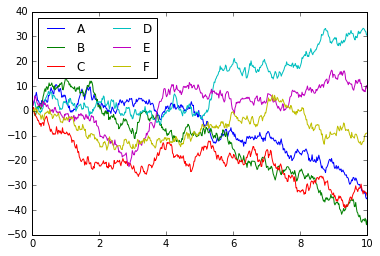

In [3]:
# same plotting code as above!
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');



尽管结果包含了我们希望传达的所有信息，但这样做的方式在美学上并不尽如人意，甚至在21世纪数据可视化的背景下看起来有些过时。

现在让我们看一下它如何与Seaborn一起工作。正如我们将看到的，Seaborn有许多自己的高级绘图例程，但它也可以覆盖Matplotlib的默认参数，进而获得甚至简单的Matplotlib脚本，以产生出色的输出。我们可以通过调用Seaborn的set（）方法来设置样式。按照惯例，Seaborn被导入为sns：

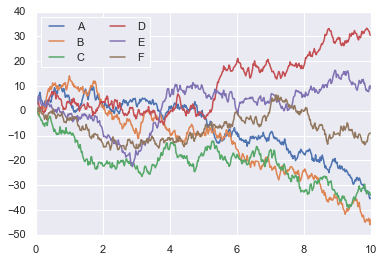

In [5]:
import seaborn as sns
sns.set()
# same plotting code as above!
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

### 探索Seaborn 来作图
Seaborn的主要思想是，它提供高级命令来创建可用于统计数据探索甚至是某些统计模型拟合的各种图类型。

让我们看一下Seaborn中可用的一些数据集和绘图类型。请注意，以下所有操作都可以使用原始Matplotlib命令完成（实际上，这是Seaborn在后台执行的操作），但是Seaborn API更加方便。

#### 直方图，KDE和密度
 
通常，在统计数据可视化中，您只需要绘制直方图和变量的联合分布即可。我们已经看到，这在Matplotlib中相对简单：

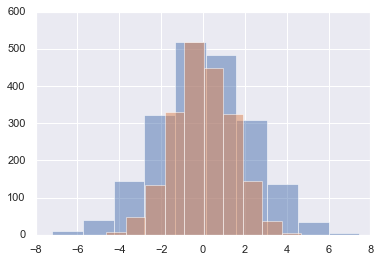

In [8]:
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])

for col in 'xy':
    plt.hist(data[col],  alpha=0.5,label=col)

除了使用直方图，我们还可以使用内核密度估计来平滑地估计分布，Seaborn使用sns.kdeplot进行了处理：

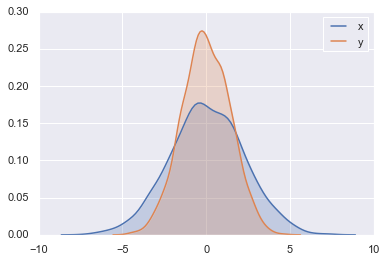

In [9]:
for col in 'xy':
    sns.kdeplot(data[col], shade=True)

直方图和KDE可以使用distplot组合：

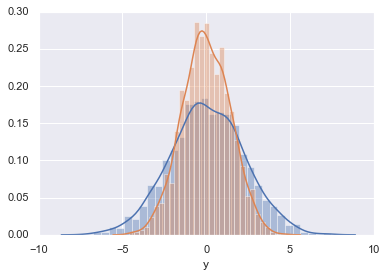

In [10]:
sns.distplot(data['x'])
sns.distplot(data['y']);

如果将完整的二维数据集传递给kdeplot，我们将获得数据的二维可视化：

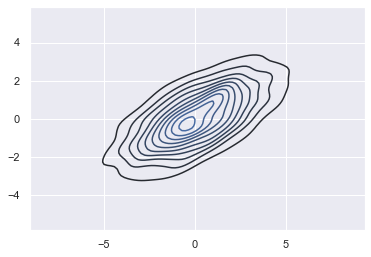

In [11]:
sns.kdeplot(data);

我们可以使用sns.jointplot看到联合分布和边际分布。对于此绘图，我们将样式设置为白色背景：

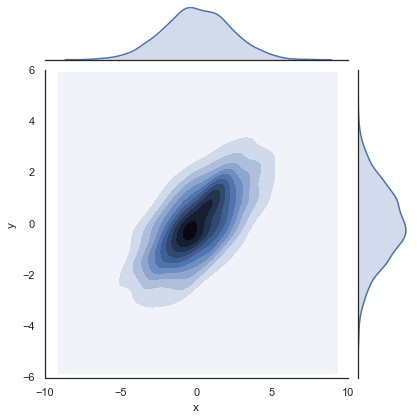

In [12]:
with sns.axes_style('white'):
    sns.jointplot("x", "y", data, kind='kde');

可以将其他参数传递给关节图-例如，我们可以改用基于六边形的直方图：

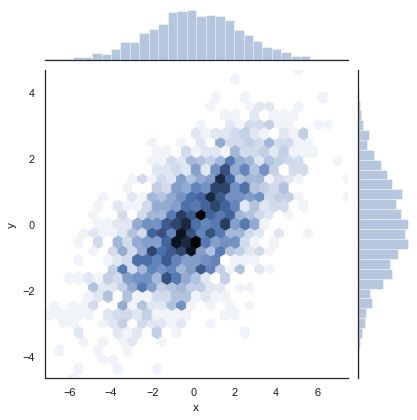

In [13]:
with sns.axes_style('white'):
    sns.jointplot("x", "y", data, kind='hex')

### 配对图
当将联合图推广到较大尺寸的数据集时，最终会得到成对图。当您要相互绘制所有值对时，这对于探索多维数据之间的相关性非常有用。

我们将使用众所周知的Iris数据集对此进行演示，该数据集列出了三种虹膜物种的花瓣和萼片的测量值：

In [15]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


可视化样本之间的多维关系就像调用sns.pairplot一样容易：

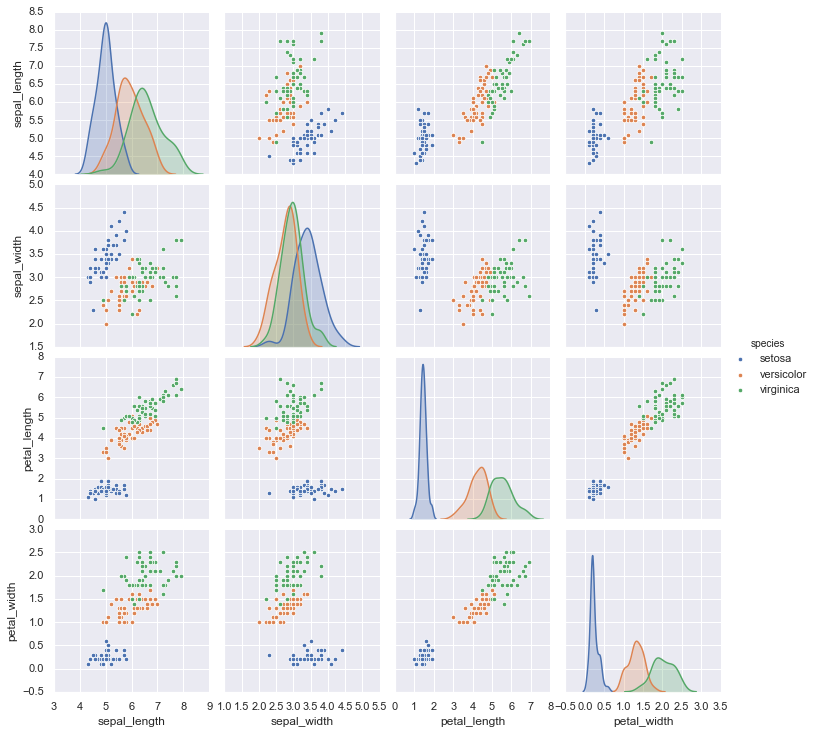

In [16]:
sns.pairplot(iris, hue='species', size=2.5);

### 多面直方图
有时，查看数据的最佳方法是通过子集的直方图。 Seaborn的FacetGrid使这一过程变得非常简单。我们将看一些数据，这些数据根据各种指标数据显示餐馆工作人员从小费中获得的金额：

In [17]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


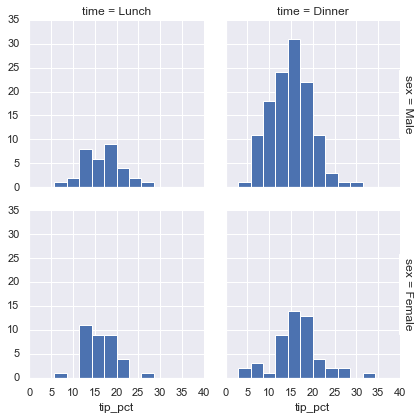

In [18]:
tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']
grid = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)
grid.map(plt.hist, "tip_pct", bins=np.linspace(0, 40, 15));

### 因子图

因子图也可用于这种可视化。这使您可以查看任何其他参数定义的仓中参数的分布：

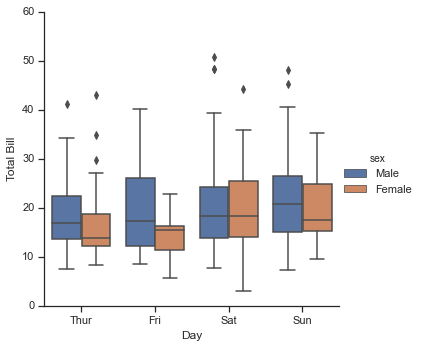

In [19]:
with sns.axes_style(style='ticks'):
    g = sns.factorplot("day", "total_bill", "sex", data=tips, kind="box")
    g.set_axis_labels("Day", "Total Bill");



### 联合图
与我们之前看到的pairplot类似，我们可以使用sns.jointplot来显示不同数据集之间的联合分布以及相关的边际分布：

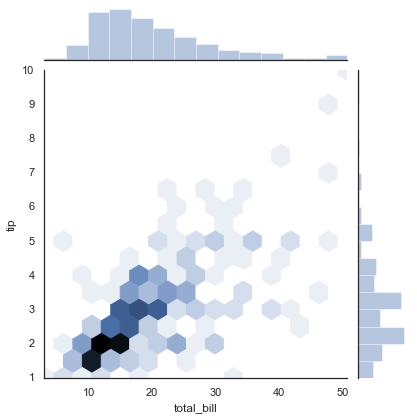

In [20]:
with sns.axes_style('white'):
    sns.jointplot("total_bill", "tip", data=tips, kind='hex')

联合图甚至可以执行一些自动核密度估计和回归：

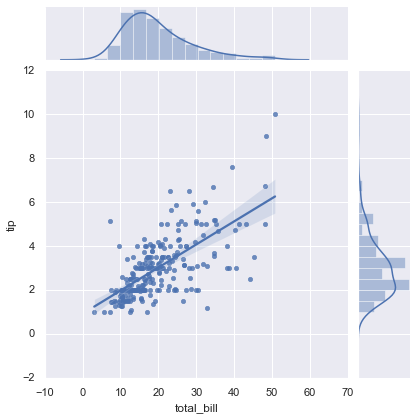

In [21]:
sns.jointplot("total_bill", "tip", data=tips, kind='reg');

### 条形图
可以使用sns.factorplot绘制时间序列。在以下示例中，我们将使用在聚合和分组中首次看到的Planets数据：

In [22]:
planets = sns.load_dataset('planets')
planets.head()



,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


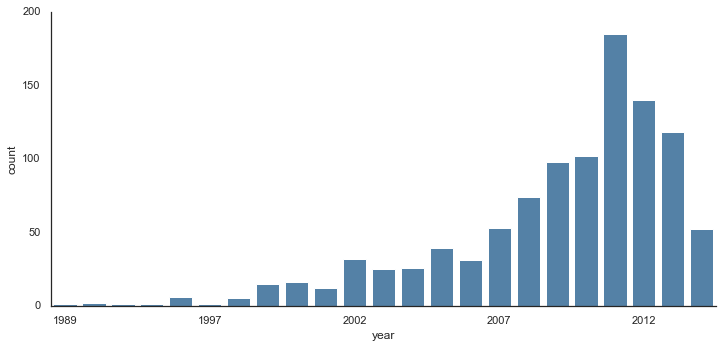

In [23]:
with sns.axes_style('white'):
    g = sns.factorplot("year", data=planets, aspect=2,
                       kind="count", color='steelblue')
    g.set_xticklabels(step=5)



通过研究发现这些行星的方法，我们可以学到更多

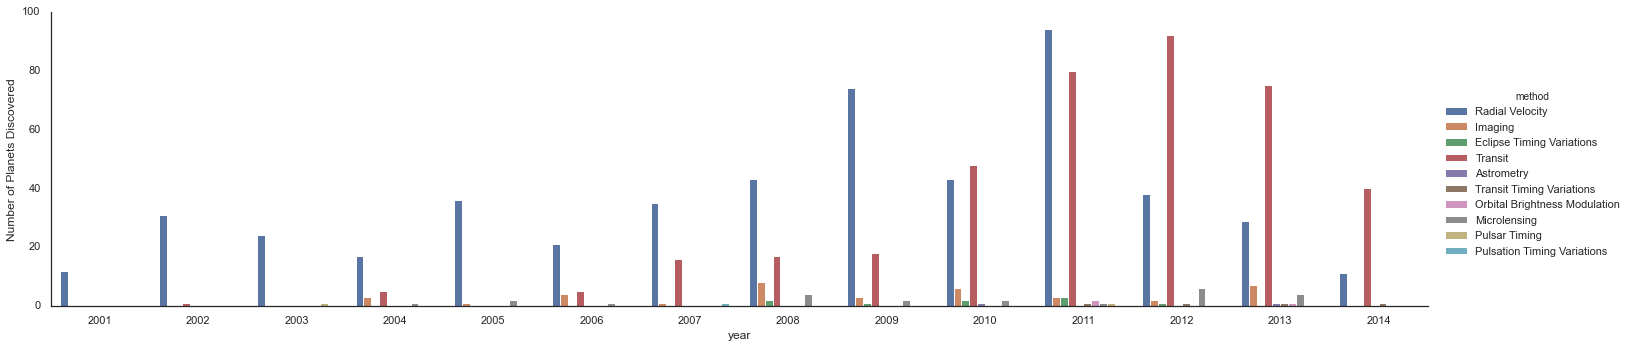

In [24]:
with sns.axes_style('white'):
    g = sns.factorplot("year", data=planets, aspect=4.0, kind='count',
                       hue='method', order=range(2001, 2015))
    g.set_ylabels('Number of Planets Discovered')



 
有关使用Seaborn进行绘图的更多信息，请参阅[Seaborn文档](http://seaborn.pydata.org/)，教程和[Seaborn gallery.](http://seaborn.pydata.org/examples/index.html)。